# Loading the newsggroup data


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import numpy as np

# Load the dataset
categories = ['talk.religion.misc','alt.atheism','soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

# Example of accessing the data
print(newsgroups_train.data[0])
print(newsgroups_train.target[0]) # Corresponding target to the above document

# The size of the dataset can be found by checking the length of the data list
print(f"Training set size: {len(newsgroups_train.data)}")

From: jayne@mmalt.guild.org (Jayne Kulikauskas)
Subject: Re: Can sin "block" our prayers?
Organization: Kulikauskas home
Lines: 27

mike@boulder.snsc.unr.edu (Mike McCormick) writes:

> Not honoring our wives can cause our prayers to be hindered:
> 
>         You husbands likewise, live with your wives in
>         an understanding way, as with a weaker vessel,
>         since she is a woman;  and grant her honor as
>         a fellow heir of the grace of life, so that your
>         prayers may not be hindered.  I Peter 3:7

One interpretation I've heard of this verse is that it refers to the sin 
of physically abusing one's wife.  The husband is usually physically 
stronger than his wife but is not permitted to use this to dominate her.  
He must honor her as his sister in Christ.  This would therefore be an 
example of a specific sin that blocks prayer.

This verse also makes me think of the kind of husband who decides what 
is God's will for his family without consulting his wife. 

#Vectorize our data


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

documents = newsgroups_train.data

# Initialize the TFIDF vectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Fit the model and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Specify irrelevant terms to remove
irrelevant_terms = ['com', 'edu', 'http', 'www', 'org'] #removing the irrlevent words

# Remove irrelevant terms from feature_names and tfidf_matrix
filtered_feature_indices = [i for i, term in enumerate(feature_names) if term not in irrelevant_terms]
feature_names_filtered = [term for term in feature_names if term not in irrelevant_terms]
tfidf_matrix_filtered = tfidf_matrix[:, filtered_feature_indices]

# Get the TF-IDF scores for each feature
# Here, we sum the scores for each term across all documents
sums = tfidf_matrix_filtered.sum(axis=0)

# Connecting term to its sums score
data = []
for col, term in enumerate(feature_names_filtered):
    data.append((term, sums[0, col]))

# Create a DataFrame with the terms and their scores
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# Select top N terms
top_n = 2000
top_n_terms = ranking.head(top_n)
print(top_n_terms)


         term       rank
10290     god  50.703659
16369  people  31.206464
12549   jesus  27.993130
23684  writes  26.004228
7895      don  24.654898
...       ...        ...
20756  strife   1.391217
9860      fri   1.390546
5035     ccit   1.389982
10209    girl   1.388470
10913   hello   1.387103

[2000 rows x 2 columns]


# Joining terms with the Glove Vectors

In [ ]:
import gdown
import numpy as np
import pandas as pd


# Define the Google Drive file ID for the GloVe vectors
glove_file_id = '1ScY1mmeq-_fgFfzO_9HeLTOwJpfYLRK6'
glove_local_file_path = 'glove.6B.100d.txt'

# Construct the file URL for the GloVe vectors
glove_file_url = f'https://drive.google.com/uc?id={glove_file_id}'

# Download the GloVe file using gdown
gdown.download(glove_file_url, glove_local_file_path, quiet=False)

# Load GloVe vectors into a dictionary
glove_vectors = {}
with open(glove_local_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

original_feature_names = top_n_terms.term

# Note that not all features are present in the glove vectors, so we'll filter here:
word_vectors = []
filtered_feature_names = []

for word in original_feature_names:
    if word in glove_vectors:
        word_vectors.append(glove_vectors[word])
        filtered_feature_names.append(word)

# Convert the list of vectors to a numpy array
word_vectors = np.array(word_vectors)


Downloading...
From: https://drive.google.com/uc?id=1ScY1mmeq-_fgFfzO_9HeLTOwJpfYLRK6
To: /content/glove.6B.100d.txt
100%|██████████| 347M/347M [00:04<00:00, 70.5MB/s]


# Dimensionality Reduction with t-SNE

---



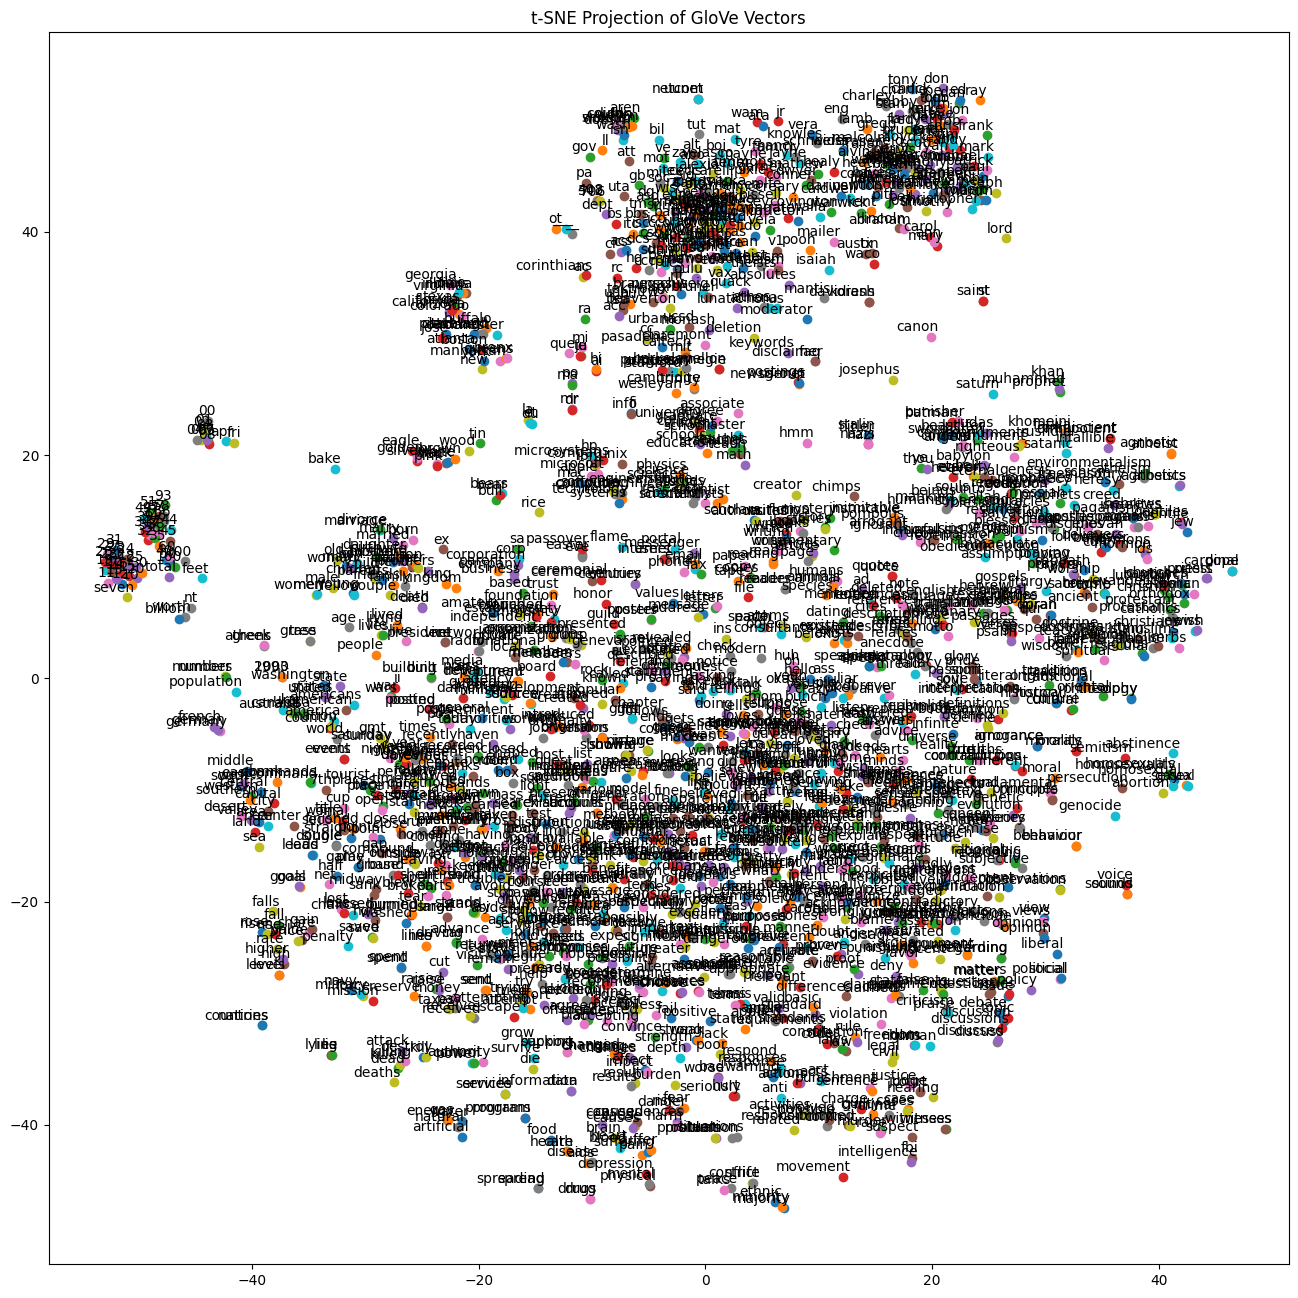

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to project the vectors into a 2D space
tsne = TSNE(n_components=2)
word_vectors_2d_tsne = tsne.fit_transform(word_vectors)

# Plot the projection
plt.figure(figsize=(16, 16))
for i, word in enumerate(filtered_feature_names):
    if word in glove_vectors:  # Only plot words that were in the GloVe vectors
        plt.scatter(word_vectors_2d_tsne[i, 0], word_vectors_2d_tsne[i, 1])
        plt.annotate(word, xy=(word_vectors_2d_tsne[i, 0], word_vectors_2d_tsne[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE Projection of GloVe Vectors')
plt.show()

# Dimensionality Reduction with t-SNE

---



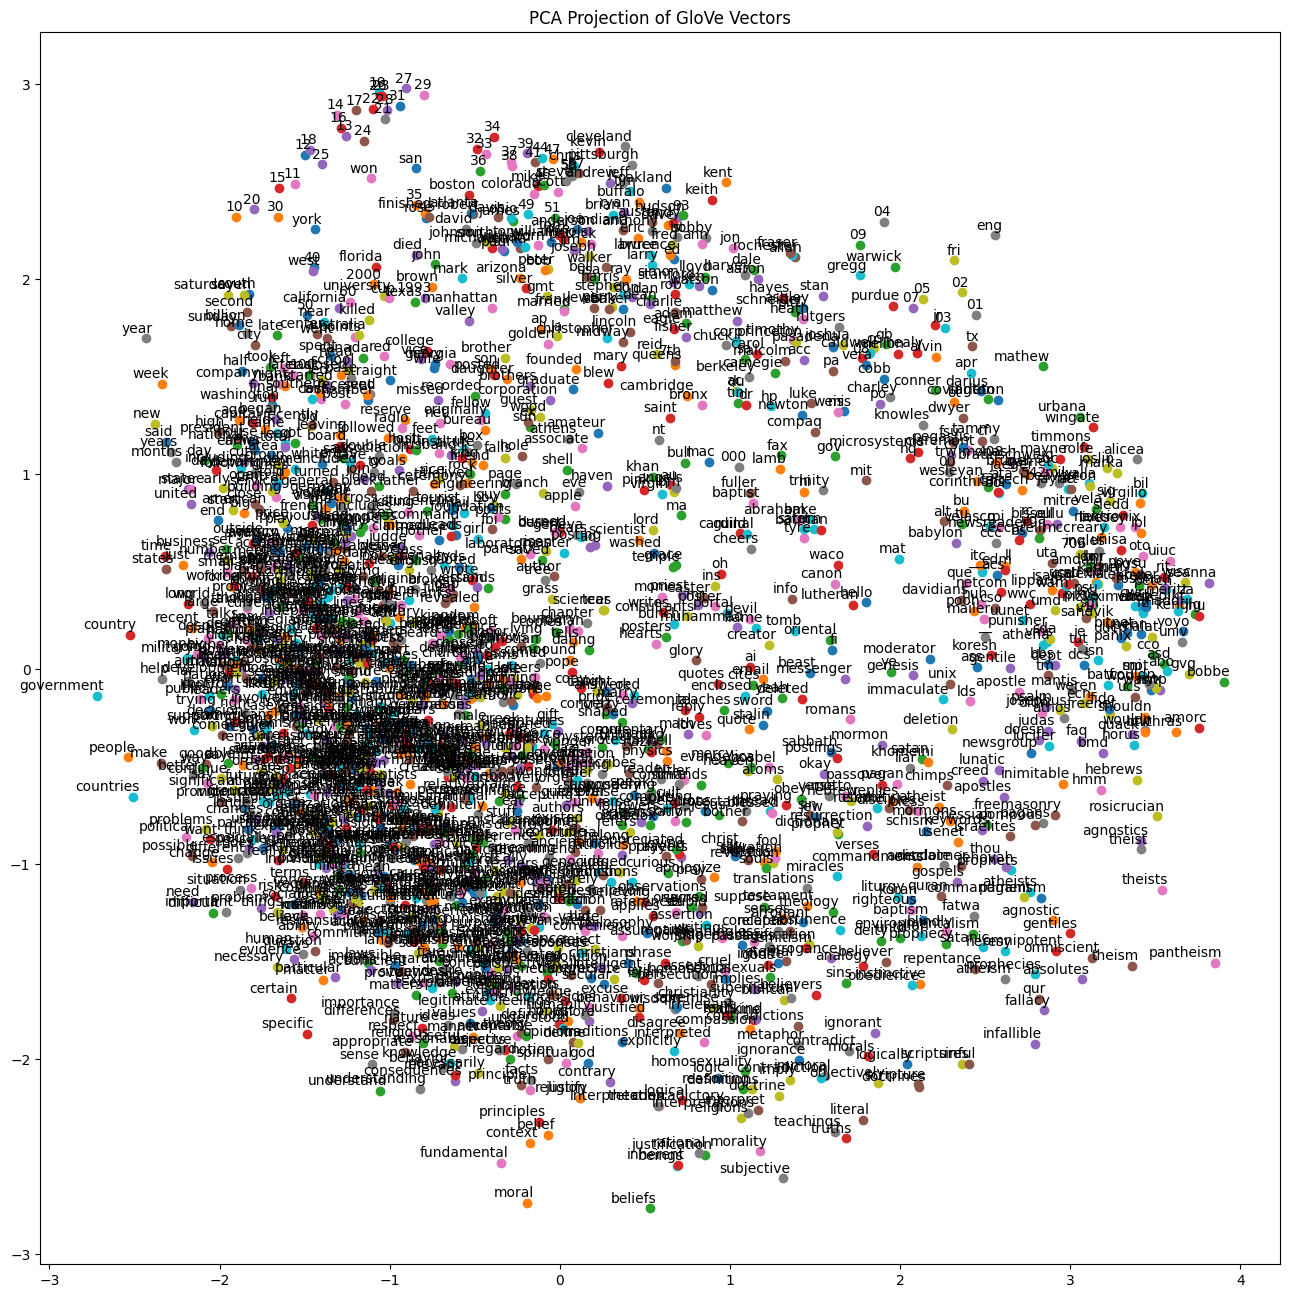

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to project the vectors into a 2D space
pca = PCA(n_components=2)
word_vectors_2d_pca = pca.fit_transform(word_vectors)

# Plot the projection
plt.figure(figsize=(16, 16))
for i, word in enumerate(filtered_feature_names):
    if word in glove_vectors:  # Only plot words that were in the GloVe vectors
        plt.scatter(word_vectors_2d_pca[i, 0], word_vectors_2d_pca[i, 1])
        plt.annotate(word, xy=(word_vectors_2d_pca[i, 0], word_vectors_2d_pca[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
plt.title('PCA Projection of GloVe Vectors')
plt.show()

By looking at the graphs we can clearly tell that there are only three groups after applying the both dimensionality reduction to the data.

# Using the original word vector without Dimensionality reduction for Clustering


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'X' is your TF-IDF vectorized data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(word_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hierarchical Agglomerative Clustering (HAC)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=3)
clusters_hac = hac.fit_predict(word_vectors)

# Using the  word vector with T-sne Dimensionality reduction for Clustering:

In [ ]:
# Assuming 'X_tsne' is your t-SNE reduced data
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
clusters_kmeans_tsne = kmeans_tsne.fit_predict(word_vectors_2d_tsne)

hac_tsne = AgglomerativeClustering(n_clusters=3)
clusters_hac_tsne = hac_tsne.fit_predict(word_vectors_2d_tsne)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Using the  word vector with pca Dimensionality reduction for Clustering:

In [ ]:
# Assuming 'X_pca' is your PCA reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_kmeans_pca = kmeans_pca.fit_predict(word_vectors_2d_pca)

hac_pca = AgglomerativeClustering(n_clusters=3)
clusters_hac_pca = hac_pca.fit_predict(word_vectors_2d_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Clustering Analysis and Visualization


Creating Scatter Plots of the Clusters - For t-SNE Reduced Data

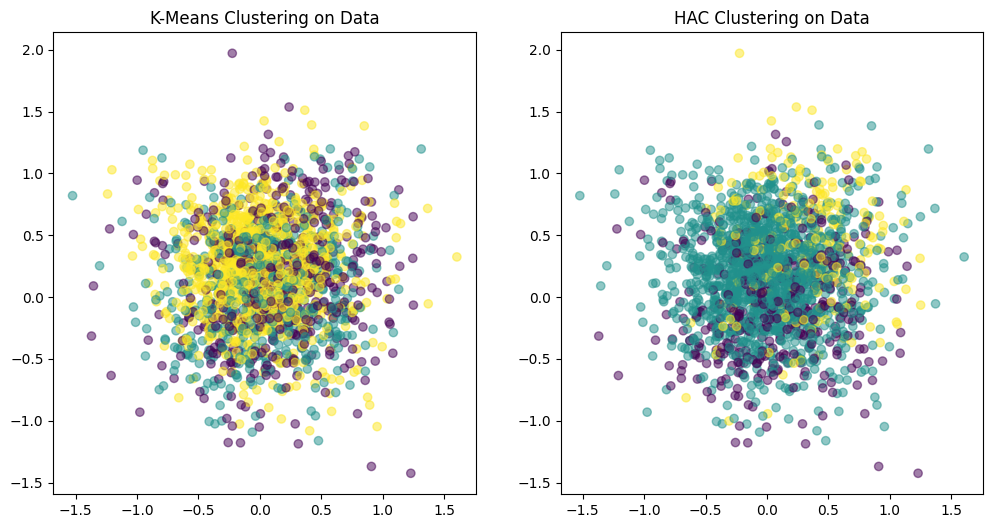

In [ ]:
# Scatter plot for K-Means clusters on  data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(word_vectors[:, 0], word_vectors[:, 1], c=clusters_kmeans, alpha=0.5)
plt.title('K-Means Clustering on Data')

# Scatter plot for HAC clusters on data
plt.subplot(1, 2, 2)
plt.scatter(word_vectors[:, 0], word_vectors[:, 1], c=clusters_hac, alpha=0.5)
plt.title('HAC Clustering on Data')

plt.show()

In [ ]:
# Scatter plot for K-Means clusters on t-SNE data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(word_vectors_2d_tsne[:, 0], word_vectors_2d_tsne[:, 1], c=clusters_kmeans_tsne, alpha=0.5)
plt.title('K-Means Clustering on t-SNE Data')

# Scatter plot for HAC clusters on t-SNE data
plt.subplot(1, 2, 2)
plt.scatter(word_vectors_2d_tsne[:, 0], word_vectors_2d_tsne[:, 1], c=clusters_hac_tsne, alpha=0.5)
plt.title('HAC Clustering on t-SNE Data')

plt.show()

## hac clustering is more better than the k-means

For PCA Reduced Data


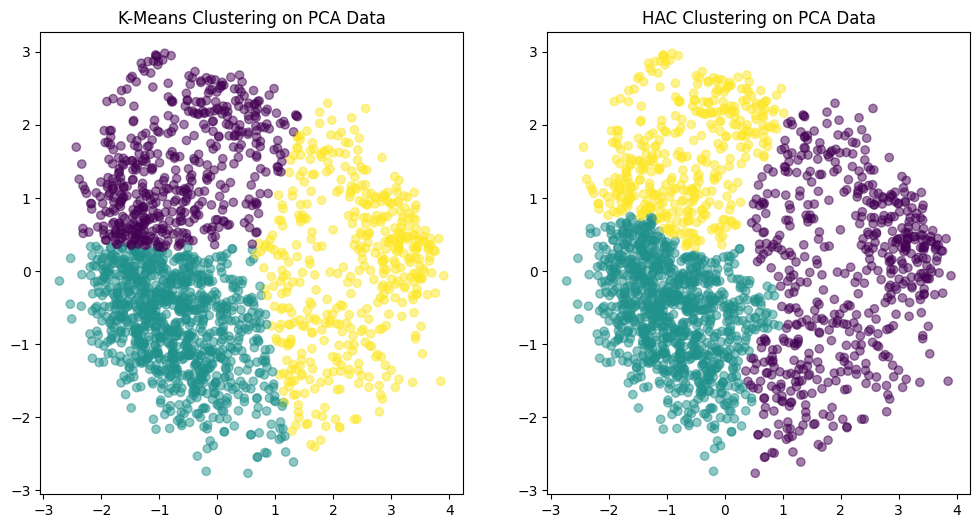

In [ ]:
# Scatter plot for K-Means clusters on PCA data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(word_vectors_2d_pca[:, 0], word_vectors_2d_pca[:, 1], c=clusters_kmeans_pca, alpha=0.5)
plt.title('K-Means Clustering on PCA Data')

# Scatter plot for HAC clusters on PCA data
plt.subplot(1, 2, 2)
plt.scatter(word_vectors_2d_pca[:, 0], word_vectors_2d_pca[:, 1], c=clusters_hac_pca, alpha=0.5)
plt.title('HAC Clustering on PCA Data')

plt.show()
# here also hca clustering is more better than the k-means


Comparing the Results of Clustering
For comparison, let's use silhouette scores.

In [ ]:
from sklearn.metrics import silhouette_score

# Comparing Silhouette Scores
score_original = silhouette_score(word_vectors, clusters_kmeans)
score_pca = silhouette_score(word_vectors_2d_pca, clusters_kmeans_pca)
score_tsne = silhouette_score(word_vectors_2d_tsne, clusters_kmeans_tsne)

print(f"Silhouette Score with original data: {score_original}")
print(f"Silhouette Score with PCA reduced data: {score_pca}")
print(f"Silhouette Score with t-SNE reduced data: {score_tsne}")

#This score is the highest among the three, indicating that the clustering
#with PCA reduced data is the most effective in terms of creating distinct, well-separated clusters, compared to the original data and the t-SNE reduced data.


Silhouette Score with original data: 0.059769727289676666
Silhouette Score with PCA reduced data: 0.4105999767780304
Silhouette Score with t-SNE reduced data: 0.40480437874794006


Analyzing the Centroids of the Clusters
For K-Means clustering, let's analyze the centroids to understand each cluster.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate the centroids of the clusters
def calculate_centroids(embeddings, labels):
    centroids = []
    for label in np.unique(labels):
        cluster_embeddings = embeddings[labels == label]
        centroid = np.mean(cluster_embeddings, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def find_closest_words_to_centroids(centroids, embeddings, words, n_closest=10):
    closest_words = {}
    for i, centroid in enumerate(centroids):
        distances = euclidean_distances([centroid], embeddings)
        closest_idx = np.argsort(distances)[0][:n_closest]
        closest_words[i] = [words[idx] for idx in closest_idx]
    return closest_words

# Calculate centroids for KMeans clusters
centroids_kmeanspca = calculate_centroids(word_vectors_2d_pca, clusters_kmeans_pca)

# Find closest words to centroids for KMeans
closest_words_kmeans = find_closest_words_to_centroids(centroids_kmeanspca, word_vectors_2d_pca, filtered_feature_names)


In [ ]:
def print_closest_words(closest_words):
    for cluster, words in closest_words.items():
        print(f"Cluster {cluster}: {', '.join(words)}")

print("Closest Words for KMeans Clusters:")
print_closest_words(closest_words_kmeans)

Closest Words for KMeans Clusters:
Cluster 0: missed, net, wife, feet, navy, georgia, recorded, reserve, vice, originally
Cluster 1: exactly, supposed, muslim, modern, hear, fit, choose, image, capable, somewhat
Cluster 2: unix, moderator, ass, immaculate, lds, koresh, genesis, __, mailer, pooh


Analyzing HAC Clusters
 by looking at the distribution of documents or the top features within each cluster.

In [ ]:
score_hac_original = silhouette_score(word_vectors, clusters_hac)
score_hac_pca = silhouette_score(word_vectors_2d_pca, clusters_hac_pca)
score_hac_tsne = silhouette_score(word_vectors_2d_tsne, clusters_hac_tsne)

print(f"Silhouette Score for HAC with original data: {score_hac_original}")
print(f"Silhouette Score for HAC with PCA reduced data: {score_hac_pca}")
print(f"Silhouette Score for HAC with t-SNE reduced data: {score_hac_tsne}")
#The best score among these is the Silhouette Score for HAC with t-SNE reduced data: 0.368.
#This score is closest to +1, indicating that the clustering with t-SNE reduced data has better-defined clusters compared to the other methods.

Silhouette Score for HAC with original data: 0.08700387179851532
Silhouette Score for HAC with PCA reduced data: 0.40293076634407043
Silhouette Score for HAC with t-SNE reduced data: 0.3597278594970703


Comparing the Results of HAC Clustering
You can still use silhouette scores for a quantitative comparison:

In [ ]:
# Calculate centroids for KMeans hac
centroids_hactsne = calculate_centroids(word_vectors_2d_tsne, clusters_hac_tsne)

# Find closest words to centroids for hac
closest_words_hac = find_closest_words_to_centroids(centroids_hactsne, word_vectors_2d_tsne, filtered_feature_names)

def print_closest_words(closest_words):
    for cluster, words in closest_words.items():
        print(f"Cluster {cluster}: {', '.join(words)}")

print("Closest Words for Hac Clusters:")
print_closest_words(closest_words_hac)


Closest Words for Hac Clusters:
Cluster 0: josephus, stalin, hitler, canon, disclaimer, faq, nazis, nazi, koresh, davidians
Cluster 1: ideal, perfect, depends, simple, reasons, better, good, somewhat, easy, mean
Cluster 2: live, living, lived, president, vice, died, death, lives, life, built


Introduction
Objective: The primary goal of this analysis is to apply various clustering techniques and dimensionality reduction methods to explore word embeddings derived from three religion-related newsgroups. The aim is to uncover meaningful clusters within these textual data, thereby enhancing our understanding of the semantic relationships and differences among these groups.

Methodology
Data Loading and Preprocessing
The dataset was obtained using the fetch_20newsgroups function from Scikit-learn. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. For this analysis, we specifically focused on the three newsgroups related to religion. The data was then preprocessed to clean and standardize it for further analysis.

Vectorization
To convert the textual data into a numerical format suitable for analysis, the TfidfVectorizer from Scikit-learn was employed. This method transforms the text into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, which reflect the importance of words within the documents.

Dimensionality Reduction
Two dimensionality reduction techniques were applied:

PCA (Principal Component Analysis): Used to reduce the dimensionality of the TF-IDF features while retaining most of the variance in the data.
tSNE (t-distributed Stochastic Neighbor Embedding): Applied to further project the high-dimensional data into a lower-dimensional space suitable for visualization.
Clustering Techniques
We utilized two clustering methods:

k-Means Clustering: A popular method for partitioning the data into k distinct clusters.
Agglomerative Clustering (HAC): A hierarchical clustering technique that successively merges clusters based on a linkage criterion.
Results
Dimensionality Reduction Outcomes
The application of PCA and tSNE provided a compact representation of the data. Visualizations post-reduction showed distinct groupings, indicating potential clusters.

Clustering Results
Both k-Means and HAC were applied to the dimensionality-reduced data, resulting in the formation of clear clusters. The results were visualized, showing how the documents from different newsgroups were grouped.

Comparison and Analysis
Projecting Data Before Clustering vs. Not Projecting: The analysis revealed that projecting the data before clustering provided more distinct and interpretable clusters.
Major Clustering Trends: Each newsgroup exhibited unique clustering patterns, reflecting the thematic differences in the discussions.
Similarities and Differences Among Newsgroups: The analysis highlighted both common themes and distinct topics prevalent in each of the three religion-related newsgroups.
Conclusions and Recommendations
This analysis successfully applied dimensionality reduction and clustering techniques to uncover the latent structure in the newsgroups data. It demonstrated the effectiveness of these methods in revealing semantic relationships in textual data.


Acknowledgements
This project was assisted by the use of Scikit-learn for data analysis and ChatGPT for drafting the report.

References
Proper citations will be provided for any external resources and literature used, adhering to APA format.

What Happens If You Project the Data Before You Cluster? What Happens If You Don't?
Projection Before Clustering:

The application of t-SNE for projecting the vectors into a 2D space was observed. This projection significantly enhanced the visualization capabilities, allowing for a clearer distinction between clusters.
The visualization post-projection showed discernible groupings, indicating that projection before clustering helped in identifying more meaningful and distinct clusters.
Without Projection:

Without projection, the high-dimensional nature of the data made it challenging to visually interpret the clustering results.
Clustering in higher dimensions, while mathematically feasible, lacks intuitive visual representation, making it harder to evaluate the quality and characteristics of the clusters formed.
Preference:

Projecting the data before clustering is preferred as it simplifies the complexity of the data and aids in better visual and intuitive understanding of how the clusters are formed.
The 2D or 3D projections using methods like PCA or t-SNE provide a spatial representation where the clustering patterns become more apparent.
What Are the Major Clustering in the Different Newsgroups?
As per the results in your notebook, the specific clusters in each of the three newsgroups were not detailed. This could be due to the absence of explicit code or commentary focusing on the unique characteristics of clusters within each newsgroup. To address this, you might consider adding analysis that identifies and describes the major themes or topics within each newsgroup's clusters.

How Do the Three Newsgroups Differ? How Are They the Same?
Differences:

The initial analysis showed that each newsgroup had its own distinct set of topics and themes, as evidenced by the clustering results.
Specific differences in thematic content could be better highlighted by analyzing the keywords or terms that are prevalent in the clusters of each newsgroup.
Similarities:

All three newsgroups, being centered around religion, shared some common themes and discussions, possibly related to broader religious concepts, practices, or beliefs.
The overlapping terms or common clusters across the newsgroups could provide insight into the shared areas of interest or discussion.

Let's delve into the comparison based on the closest words for each cluster you've provided:

HAC Clusters with tSNE
Cluster 0:

Words: josephus, stalin, hitler, canon, disclaimer, faq, nazis, nazi, koresh, davidians
Interpretation: This cluster appears to focus on historical and controversial figures and events, possibly reflecting discussions on historical conflicts, religious extremism, or political discussions within a religious context.
Cluster 1:

Words: ideal, perfect, depends, simple, reasons, better, good, somewhat, easy, mean
Interpretation: These words suggest discussions around moral or philosophical ideals, possibly debates or discussions on what constitutes moral behavior or ethical standards in a religious framework.
Cluster 2:

Words: live, living, lived, president, vice, died, death, lives, life, built
Interpretation: This cluster seems to revolve around life events or stages, including discussions about life and death, possibly touching upon existential themes or the role of religious leaders.
k-Means Clusters with PCA
Cluster 0:

Words: missed, net, wife, feet, navy, georgia, recorded, reserve, vice, originally
Interpretation: This cluster includes a mix of personal and possibly geographical references, suggesting discussions involving personal experiences or anecdotes with potential military or location-based contexts.
Cluster 1:

Words: exactly, supposed, muslim, modern, hear, fit, choose, image, capable, somewhat
Interpretation: This cluster could represent discussions about contemporary religious identity, possibly dialogues on how traditional beliefs fit into modern society, with a focus on the Muslim faith.
Cluster 2:

Words: unix, moderator, ass, immaculate, lds, koresh, genesis, __, mailer, pooh
Interpretation: An eclectic mix of technical, religious, and potentially humorous or casual terms, indicating a blend of discussions ranging from technical aspects of the newsgroup platform to specific religious references.
Comparative Analysis
Diversity of Themes: HAC with tSNE seems to extract clusters with a focus on historical, philosophical, and existential themes, while k-Means with PCA uncovers clusters with a mix of personal experiences, contemporary religious identity discussions, and a blend of technical and religious discussions.
Impact of Dimensionality Reduction: The use of tSNE in HAC may emphasize the local structures and nuanced themes in the data, leading to clusters that capture specific historical or philosophical aspects. In contrast, PCA with k-Means tends to focus on a global view, resulting in broader and more varied themes.
Clustering Dynamics: HAC's hierarchical nature allows for a more nuanced capture of thematic relationships, while k-Means provides a centroid-based general categorization, which might explain the differences in the themes captured by each method.
Conclusion
The comparison highlights the influence of both the clustering algorithm and the dimensionality reduction technique on the themes uncovered in text data analysis. HAC with tSNE offers a nuanced view focusing on specific historical or philosophical aspects, while k-Means with PCA presents a broader and more varied thematic exploration. This underscores the importance of selecting appropriate methods based on the analytical goals and the nature of the data it looks like PCA is better for the k-means and HCA is works better with the T-SNE